In [1]:
import sys
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy

# Define loss function and load the pre-trained model

In [3]:
def cce_function(y_true, y_pred):
    return categorical_crossentropy(y_true, y_pred, label_smoothing=0.1)

l_model = load_model("models/model-12-0.71.hdf5", custom_objects={'cce_function': cce_function})

# Category and label mapping
| Category       | Label           | 
| ------------- |:------:| 
| C0            | 0      |
| C2            | 1      |
| C4            | 2      |

# 1. Prediction with the validation dataset

### How badly do you think is this house damaged?

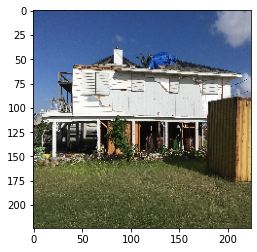

In [4]:
img = image.load_img('/tmp/Dataset_2/Validation/C4/8108cbbf-60ca-47d8-af13-2e3603a5c30e.jpg', target_size=(224,224))
plt.imshow(img)

In [5]:
img = np.expand_dims(img, axis=0)
y_pred = l_model.predict(img)
np.argmax(y_pred)

2

### How about this one?

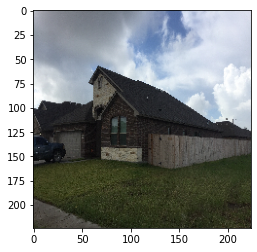

In [6]:
img = image.load_img('/tmp/Dataset_2/Validation/C0/3ea20934-f2c0-4cca-a034-dc503876ada2.jpg', target_size=(224,224))
plt.imshow(img)

In [7]:
img = np.expand_dims(img, axis=0)
y_pred = l_model.predict(img)
np.argmax(y_pred)

0

### And this one?

0

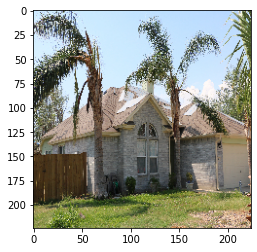

In [8]:
img = image.load_img('/tmp/Dataset_2/Validation/C2/5584fcc3-5cfc-435c-8c8a-bff08605b552.jpg', target_size=(224,224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
y_pred = l_model.predict(img)
np.argmax(y_pred)

# 2. Randomly image selection and prediction
### Run this as many time as you want. Look at the categories and predicted labels.
| Category       | Label           | 
| ------------- |:------:| 
| C0            | 0      |
| C2            | 1      |
| C4            | 2      |

/tmp/Dataset_2/Validation/C4/8921ab76-46ce-4419-9f70-a8d786b48ceb.png
2


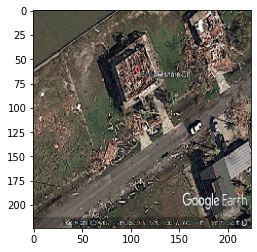

In [13]:
flist = glob.glob("/tmp/Dataset_2/Validation/*/*g", recursive=True)

r = random.randint(0, len(flist))
f = flist[r]

print(f)
img = image.load_img(f, target_size=(224,224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
y_pred = l_model.predict(img)
print(np.argmax(y_pred))
